In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("uber.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df = data.copy()
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df = df.drop(['Unnamed: 0','key'],axis=1)
df.dropna(axis=0,inplace=True)

In [8]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## Haversine Formula
Calculatin the distance between the pickup and drop co-ordinates using the Haversine formual for accuracy.

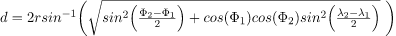

In [9]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [10]:
df['Distance']= haversine(df['pickup_longitude'], df['dropoff_longitude'],
                             df['pickup_latitude'], df['dropoff_latitude'])

df['Distance'] = df['Distance'].astype(float).round(2) 

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


Text(0, 0.5, 'fare_amount')

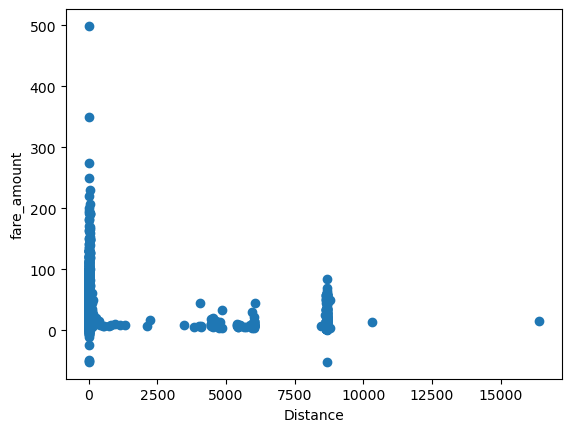

In [12]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

## Outliers
We can get rid of the trips with very large distances that are outliers as well as trips with 0 distance.

In [13]:
df.drop(df[df['Distance'] > 60].index, inplace = True)
df.drop(df[df['Distance'] == 0].index, inplace = True)
df.drop(df[df['Distance'] < 0].index, inplace = True)

df.drop(df[df['fare_amount'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] < 0].index, inplace = True)

In [14]:
df.drop(df[df['Distance'] > 100].index, inplace = True)
df.drop(df[df['fare_amount'] > 100].index, inplace = True)

Also removing rows with non-plausible fare amounts and distance travelled

In [15]:
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193436 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193436 non-null  float64
 1   pickup_datetime    193436 non-null  object 
 2   pickup_longitude   193436 non-null  float64
 3   pickup_latitude    193436 non-null  float64
 4   dropoff_longitude  193436 non-null  float64
 5   dropoff_latitude   193436 non-null  float64
 6   passenger_count    193436 non-null  int64  
 7   Distance           193436 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.3+ MB


Text(0, 0.5, 'fare_amount')

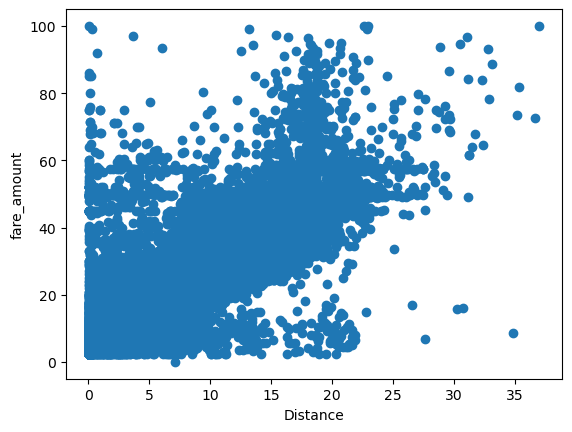

In [17]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

Separating the date and time into separate columns for more usability

In [18]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['Year'] = df['pickup_datetime'].apply(lambda time: time.year)
df['Month'] = df['pickup_datetime'].apply(lambda time: time.month)
df['Day'] = df['pickup_datetime'].apply(lambda time: time.day)
df['Day of Week'] = df['pickup_datetime'].apply(lambda time: time.dayofweek)
df['Day of Week_num'] = df['pickup_datetime'].apply(lambda time: time.dayofweek)
df['Hour'] = df['pickup_datetime'].apply(lambda time: time.hour)

day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(day_map)

df['counter'] = 1

Creating separate coumns for pickup and droppoff coordinates for more usability.

In [19]:
df['pickup'] = df['pickup_latitude'].astype(str) + "," + df['pickup_longitude'].astype(str)   
df['drop off'] = df['dropoff_latitude'].astype(str) + "," + df['dropoff_longitude'].astype(str)

In [20]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,Day of Week,Day of Week_num,Hour,counter,pickup,drop off
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.68,2015,5,7,Thu,3,19,1,"40.73835372924805,-73.99981689453125","40.72321701049805,-73.99951171875"
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.46,2009,7,17,Fri,4,20,1,"40.728225,-73.994355","40.750325,-73.99471"
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.04,2009,8,24,Mon,0,21,1,"40.74077,-74.005043","40.772647,-73.962565"
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.66,2009,6,26,Fri,4,8,1,"40.790844,-73.976124","40.803349,-73.965316"
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.48,2014,8,28,Thu,3,17,1,"40.744085,-73.925023","40.761247,-73.97308199999999"


## Correlation

In [21]:
corr = df.corr()

corr.style.background_gradient(cmap='BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Day,Day of Week_num,Hour,counter
fare_amount,1.000000,0.012292,-0.008891,0.010831,-0.009044,0.014409,0.895513,0.124050,0.024850,0.000277,0.004881,-0.020270,nan
pickup_longitude,0.012292,1.000000,-0.949099,0.999885,-0.993976,0.009176,0.005356,0.013480,-0.007497,0.019531,0.008243,0.001835,nan
pickup_latitude,-0.008891,-0.949099,1.000000,-0.949096,0.954760,-0.009219,0.003243,-0.013693,0.007602,-0.019393,-0.008924,-0.001821,nan
dropoff_longitude,0.010831,0.999885,-0.949096,1.000000,-0.993964,0.009164,0.004464,0.013373,-0.007452,0.019555,0.008543,0.000937,nan
dropoff_latitude,-0.009044,-0.993976,0.954760,-0.993964,1.000000,-0.009263,-0.002255,-0.014365,0.007982,-0.020119,-0.008916,-0.001016,nan
passenger_count,0.014409,0.009176,-0.009219,0.009164,-0.009263,1.000000,0.007852,0.005388,0.010002,0.003742,0.033882,0.013427,nan
Distance,0.895513,0.005356,0.003243,0.004464,-0.002255,0.007852,1.000000,0.025569,0.012504,0.000794,0.017320,-0.032766,nan
Year,0.124050,0.013480,-0.013693,0.013373,-0.014365,0.005388,0.025569,1.000000,-0.115519,-0.012210,0.005962,0.001849,nan
Month,0.024850,-0.007497,0.007602,-0.007452,0.007982,0.010002,0.012504,-0.115519,1.000000,-0.017112,-0.008894,-0.004274,nan
Day,0.000277,0.019531,-0.019393,0.019555,-0.020119,0.003742,0.000794,-0.012210,-0.017112,1.000000,0.005179,0.005320,nan


There is some correlation between the distance and fare amount.<br> 
Implementing simple linear regression model using these two varaibles.

In [22]:
X = df['Distance'].values.reshape(-1, 1)       
y = df['fare_amount'].values.reshape(-1, 1)     

In [23]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.40638221]
 [-0.38489719]
 [ 0.17371326]
 ...
 [ 2.10736482]
 [ 0.3455934 ]
 [ 0.30262337]]
[[-0.46769936]
 [-0.24942881]
 [ 0.472543  ]
 ...
 [ 2.65804681]
 [ 0.05279195]
 [ 0.57887993]]


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.3, random_state=0)

# Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.8050688


In [26]:
y_pred = l_reg.predict(X_test)

In [27]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.24383300497161936
Mean Squared Error: 0.1926995801043055
Root Mean Squared Error: 0.4389756030855308


In [28]:
print(l_reg.intercept_)
print(l_reg.coef_)

[0.00029241]
[[0.89503692]]


Plotting the linear regression line against the training and test set side by side.

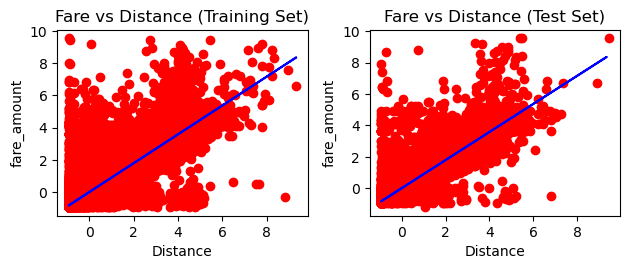

In [29]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")


plt.tight_layout()
plt.rcParams["figure.figsize"] = (32,22)
plt.show()

# Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor(n_estimators = 50, random_state = 0)

r_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [31]:
predictions = r_reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.24670010997672112
Mean Squared Error: 0.19753474247914912
Root Mean Squared Error: 0.4444488074898493
